# Spearman's Rank Correlation

## Climate Example

We will again use the a dataset containing carbon emissions, GDP and population for 164 countries (data from 2018).

These data came from <a href="https://ourworldindata.org/">Our World in Data</a>, a fabulous Oxford-based organization that provides datasets and visualizations addressing global issues.


### Set up Python libraries

As usual, run the code cell below to import the relevant Python libraries

In [1]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas 
import seaborn as sns
sns.set_theme() # use pretty defaults

### Load and inspect the data

Load the data from the file CO2vGDP.csv.

In [2]:
CO2vGDP = pandas.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook/main/data/CO2vGDP.csv')
display(CO2vGDP)

,Country,CO2,GDP,population
0,Afghanistan,0.2245,1934.555054,36686788
1,Albania,1.6422,11104.166020,2877019
2,Algeria,3.8241,14228.025390,41927008
3,Angola,0.7912,7771.441895,31273538
4,Argentina,4.0824,18556.382810,44413592
...,...,...,...,...
159,Venezuela,4.1602,10709.950200,29825652
160,Vietnam,2.3415,6814.142090,94914328
161,Yemen,0.3503,2284.889893,30790514
162,Zambia,0.4215,3534.033691,17835898




We noted previously that our climate dataset is not suitable for a 'normal' Pearson's correlation because it has one of the three freatures that violate the assumptions of Pearson's correlation:

<ul>
    <li> Non-Straight-Line relationship between x and y
    <li> Heteroscedasticity
    <li> Outliers
</ul>

In this case the problem was heteroscedasticity


### Spearman's Rank Correlation

We therefore use a rank-based form of correlation called Spearman's rank correlation coefficient $r_s$, which does not rely on the same assumptions as Pearson's correlation.

$r_s$ can be calculated using the same built-in function <tt>pandas.df.corr()</tt>:

In [3]:
CO2vGDP.corr(method='spearman')

,CO2,GDP,population
CO2,1.000000,0.914369,-0.098554
GDP,0.914369,1.000000,-0.122920
population,-0.098554,-0.122920,1.000000


The 'methods' available are:

<ul>
    <li>Pearson ('normal' correlation), 
    <li>Spearman (rank based) and 
    <li>Kendal (categorical; rarely used).     
</ul>
    
The default (the method used if no method is specified) is Pearson - we can see this by comparing the results with method specified as Pearson and no method specified:

In [4]:
CO2vGDP.corr(method='pearson')

,CO2,GDP,population
CO2,1.000000,0.795214,-0.003745
GDP,0.795214,1.000000,-0.054502
population,-0.003745,-0.054502,1.000000


In [5]:
CO2vGDP.corr()

,CO2,GDP,population
CO2,1.000000,0.795214,-0.003745
GDP,0.795214,1.000000,-0.054502
population,-0.003745,-0.054502,1.000000


### The equation

Let's check our understanding by calculating Spearman's correlation coefficient oursleves.

The equation is:
    
$$ r_s = 1 - 6 \sum{\frac{d^2}{n(n^2 - 1)}} $$

... where d is the difference in ranks between paired datapoints.

Let's walk that through.

First, we create new columns containing the rank of each datapoint - 
<ul>
    <li>the lowest GDP will have rank 1 and the highest will have rank 165
    <li>the lowest CO2 emissions will have rank 1 and the highest will have rank 165
    <li>the GDP aand CO2 ranks for each country need not match, but if GDP and CO2 are correlated, 
    <li>high-ranked countries for GDP should also be high-ranked for CO2
</ul>

In [6]:
CO2vGDP['CO2_rank'] = CO2vGDP['CO2'].rank()
CO2vGDP['GDP_rank'] = CO2vGDP['GDP'].rank()

# We can see these most clearly if we sort the dataframe before displaying
display(CO2vGDP.sort_values(by='CO2'))

,Country,CO2,GDP,population,CO2_rank,GDP_rank
39,Democratic Republic of Congo,0.0331,859.381714,87087352,1.0,4.0
26,Central African Republic,0.0471,623.488892,5094795,2.0,1.0
21,Burundi,0.0608,651.358887,11493476,3.0,2.0
27,Chad,0.0675,2046.363159,15604213,4.0,24.0
108,Niger,0.0830,964.660095,22577060,5.0,5.0
...,...,...,...,...,...,...
128,Saudi Arabia,18.4541,50304.750000,35018132,160.0,154.0
9,Bahrain,20.7778,39498.765630,1487346,161.0,143.0
79,Kuwait,23.1008,65520.738280,4317190,162.0,160.0
148,Trinidad and Tobago,29.1223,28549.408200,1504707,163.0,128.0


You can see that countries with low ranks for CO2 do tend to have low ranks for GDP.

Let's plot the data, and the ranked data, on scatterplots. You can see that the ranked data do not have the same heteroscedasticity issue as the data themselves.

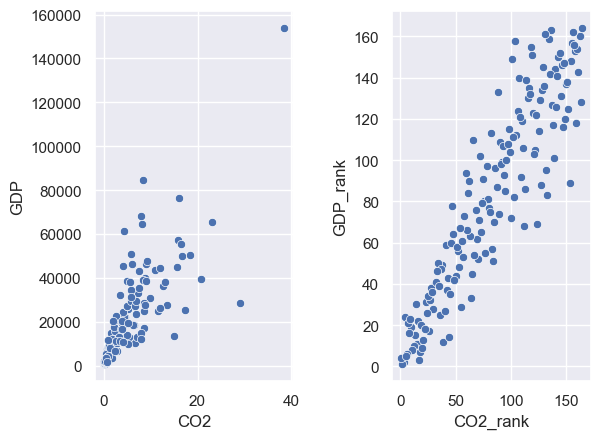

In [7]:
plt.subplot(1,2,1)
sns.scatterplot(data=CO2vGDP, x='CO2', y='GDP')

plt.subplot(1,2,2)
sns.scatterplot(data=CO2vGDP, x='CO2_rank', y='GDP_rank')

plt.subplots_adjust(wspace = 0.5) # shift the plots sideways so they don't overlap

To continue the process of applying the equation, we make a new column containing the difference of ranks:

In [8]:
CO2vGDP['d'] = CO2vGDP['CO2_rank']-CO2vGDP['GDP_rank']

... and apply the formula:

In [9]:
n = len(CO2vGDP)

r_s = 1 - 6*sum(CO2vGDP['d']**2)/(n*(n**2 - 1))
print('r = ' + str(r_s))

r = 0.9143688871356087


Ta-daa! This should match the value from the built in function.

### Spearman = Pearson on Ranks

The equation for Spearman's $r_s$ looks pretty weird, doesn't it? What is that 6 doing there?!

I can't tell you the derivation (although I believe I did once know it), but I can tell you a fun thing.

Spearman's $r_s$ is exactly the same value as Pearson's $r$ claculated on the ranks.

Let's try it!

In [10]:
# make a new dataframe with only ranks
CO2vGDP_ranks = CO2vGDP[['CO2_rank','GDP_rank']]
display(CO2vGDP_ranks)

,CO2_rank,GDP_rank
0,16.0,22.0
1,58.0,73.0
2,94.0,93.0
3,41.0,59.0
4,99.0,104.0
...,...,...
159,100.0,72.0
160,77.0,55.0
161,24.0,26.0
162,29.0,36.0


In [11]:
# Calculate **Pearson's** correlation on the ranks
CO2vGDP_ranks.corr(method='pearson')

,CO2_rank,GDP_rank
CO2_rank,1.000000,0.914369
GDP_rank,0.914369,1.000000


Yep, the correlation is 0.9138 - the exact same value as $r_s$